# matplotlibのテストコード

### 使用できる色  
[matplotlib で指定可能な色の名前と一覧 – Python でデータサイエンス (plavox.info)](https://pythondatascience.plavox.info/matplotlib/%E8%89%B2%E3%81%AE%E5%90%8D%E5%89%8D)

<BarContainer object of 8 artists>

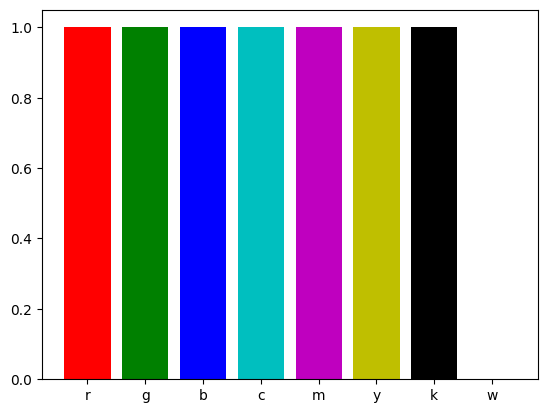

In [3]:
import matplotlib.pyplot as plt
import numpy as np
 
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
x = np.arange(1, 9)
height = np.repeat(1, 8)
plt.bar(x, height, color=colorlist, tick_label=colorlist, align="center")



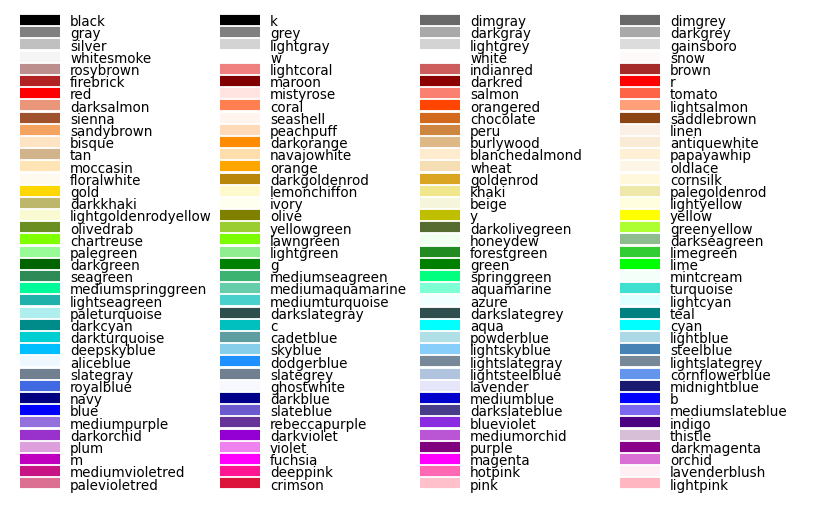

In [4]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()


### 2軸の凡例
### https://qiita.com/trami/items/df313aabfd3c4ccc534b

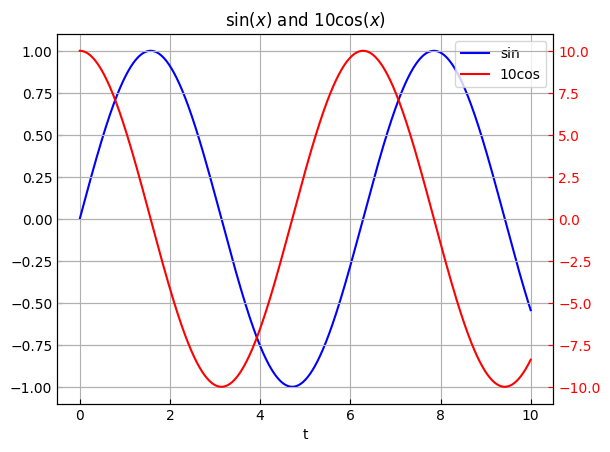

In [1]:
"""第2軸をもつグラフを描画するプログラム"""
import numpy as np
import matplotlib.pyplot as plt

# figure()でグラフを描画する領域を確保，figというオブジェクトにする．
fig = plt.figure()

# add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 1, 1) 
# x軸を共有
ax2 = ax1.twinx()   

t = np.linspace(0, 10, 1000)
y1 = np.sin(t)
y2 = 10*np.cos(t)

c1, c2 = "blue", "red"  # 各プロットの色
l1, l2 = "sin", "10cos" # 各ラベル

# 1つ目のグラフを描画
ax1.set_xlabel('t') #x軸ラベル
ax1.set_title(r"$\sin(x)$ and 10$\cos(x)$") #グラフタイトル
ax1.grid() #罫線
ax1.tick_params(direction='in')
ax1.plot(t, y1, color=c1, label=l1)
h1, l1 = ax1.get_legend_handles_labels()

# 2つ目のグラフを描画
ax2.tick_params(axis='y', direction='in', colors=c2)
ax2.grid()
ax2.plot(t, y2, color=c2, label=l2)
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1+h2, l1+l2, loc='upper right') # ax1とax2の凡例のhandlerとlabelのリストを結合
plt.show()

### バックエンドのテスト

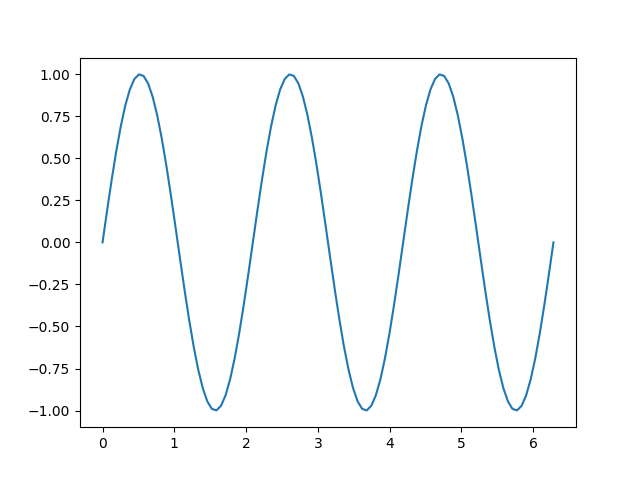

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

In [3]:
import matplotlib.pyplot as plt

month = ['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12']
amount = [37.4, 43.1, 90.9, 102.3, 117.3, 142.4, 148.1, 176.3, 201.8, 164.9, 75.7, 41.1]

plt.bar(month, amount)

<BarContainer object of 12 artists>

### プロットの設定色々

In [ ]:
# ポイントとラインで描画
ax.plot(x, y, 'o-')

### ラベル、タイトルの書式
[書式例リンク](https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_examples.html)

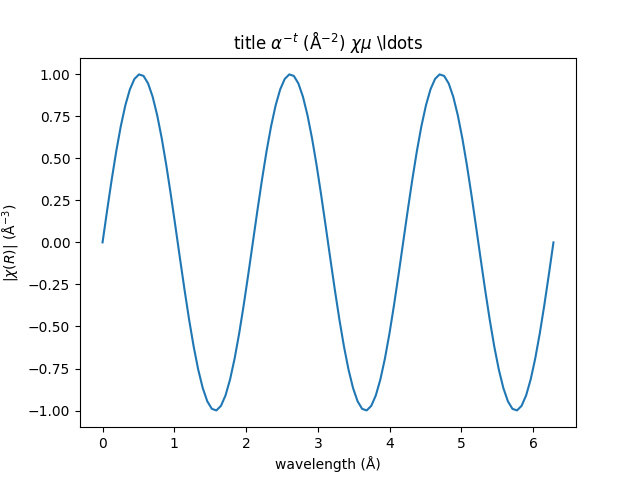

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
# chr() 945 から　969まで
# ax.set_title(f'{chr(945)}')
ANGSTROM, LAMDBA = "Åλ"
ax.set_xlabel("wavelength (%s)" % ANGSTROM)
ax.set_ylabel(r'$|\chi(R)|\ (\mathrm{\AA}^{-3})$')

ax.set_title(r'title $\alpha^{-t}\ (\mathrm{\AA}^{-2})\ \chi\mu$ \ldots')
ax.plot(x, y)

### ARIMのスタイルセット
- Noto Sans Japaneseをgoogle fontsからダウンロードしておく  
[Noto Sans Jap](https://fonts.google.com/noto/specimen/Noto+Sans+JP):ttfファイル
[Font Meme](https://fontmeme.com/jfont/noto-sans-jp-font/): otfファイル
- matplotlibのfont_managerを使ってオブジェクトを作る  
✅OSのフォント名ではNotoSansJPは使用できない  
```findfont: Font family 'Noto Sans JP' not found.```  
が出て反映されない


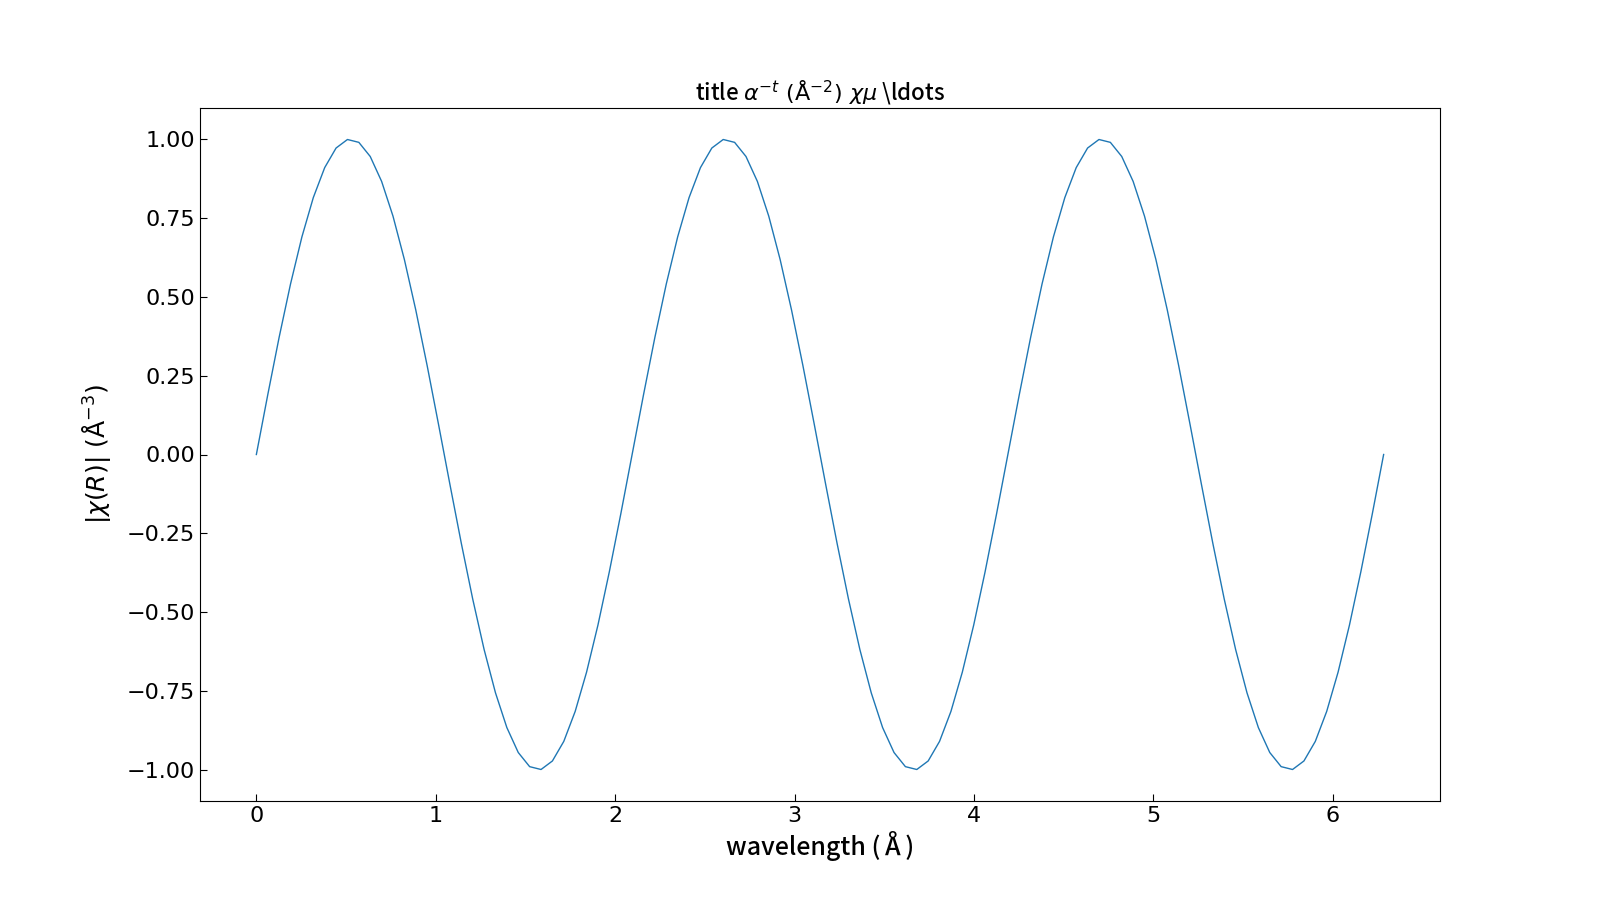

In [7]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib as mpl
import figsetting as fs
config = fs.CONFIG
from  matplotlib import rcParams
plt.rcParams.update(config)
# rcParams['font.family'] = 'Noto Sans JP'
# for key, value in config.items():
#     mpl.rcParams[key] = value
#ロカール上のフォントパスを指定(Windows標準)
# font_location = 'NotoSansJP-Medium.otf'
# FONTPROPERTIY = font_manager.FontProperties(fname=font_location)
# 
# FONT_LABEL = {
#     "fontproperties": FONTPROPERTIY,
#     "fontsize": 18,
# } 
fig, ax = plt.subplots(1, 1, figsize=fs.FIGSIZE)
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
# chr() 945 から　969まで
# ax.set_title(f'{chr(945)}')
ANGSTROM, LAMDBA = "Åλ"
ax.set_xlabel("wavelength (%s)" % ANGSTROM, **fs.FONT_LABEL)
ax.set_ylabel(r'$|\chi(R)|\ (\mathrm{\AA}^{-3})$', **fs.FONT_LABEL, labelpad=10)

ax.set_title(r'title $\alpha^{-t}\ (\mathrm{\AA}^{-2})\ \chi\mu$ \ldots', **fs.FONT_TITLE)
ax.plot(x, y)

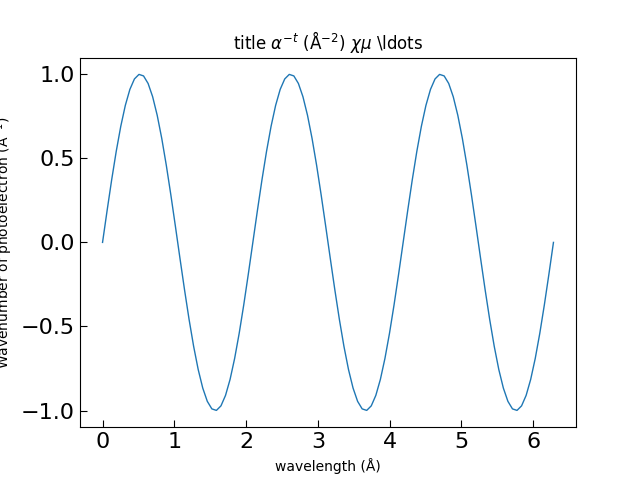

In [6]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import figsetting as fs
config = fs.CONFIG

plt.rcParams.update(config)

fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
# chr() 945 から　969まで
# ax.set_title(f'{chr(945)}')
ANGSTROM, LAMDBA = "Åλ"
ax.set_xlabel("wavelength (%s)" % ANGSTROM)
ax.set_ylabel(r'Wavenumber of photoelectron $(\mathrm{\AA}^{-1})$')

ax.set_title(r'title $\alpha^{-t}\ (\mathrm{\AA}^{-2})\ \chi\mu$ \ldots')
ax.plot(x, y)

### 複数グラフ

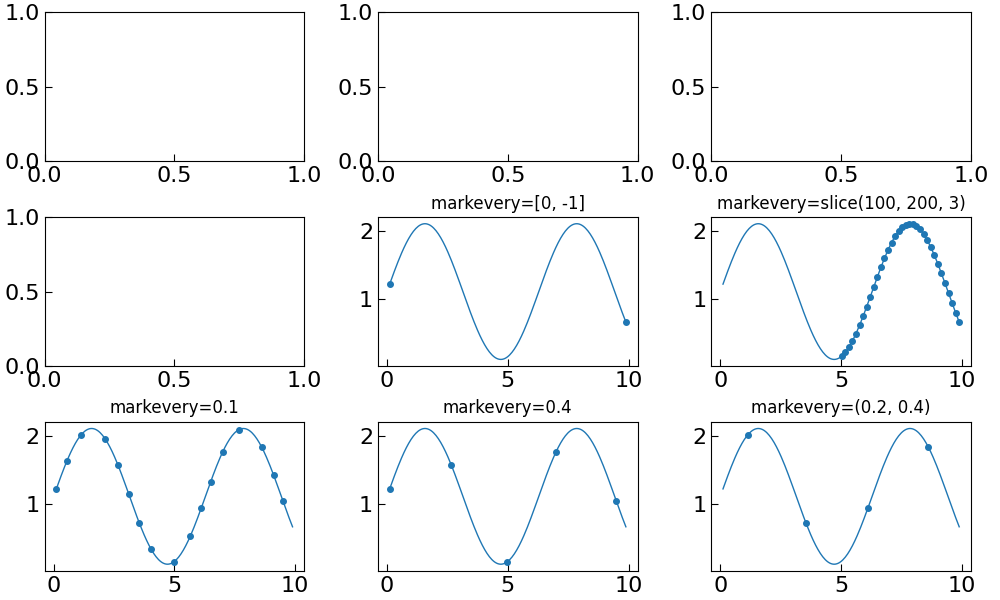

In [22]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta
fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained')
count = 0
for ax, markevery in zip(axs.flat, cases):
    if count > 3:
        ax.set_title(f'markevery={markevery}')
        ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)
    count += 1


- add_subplotで

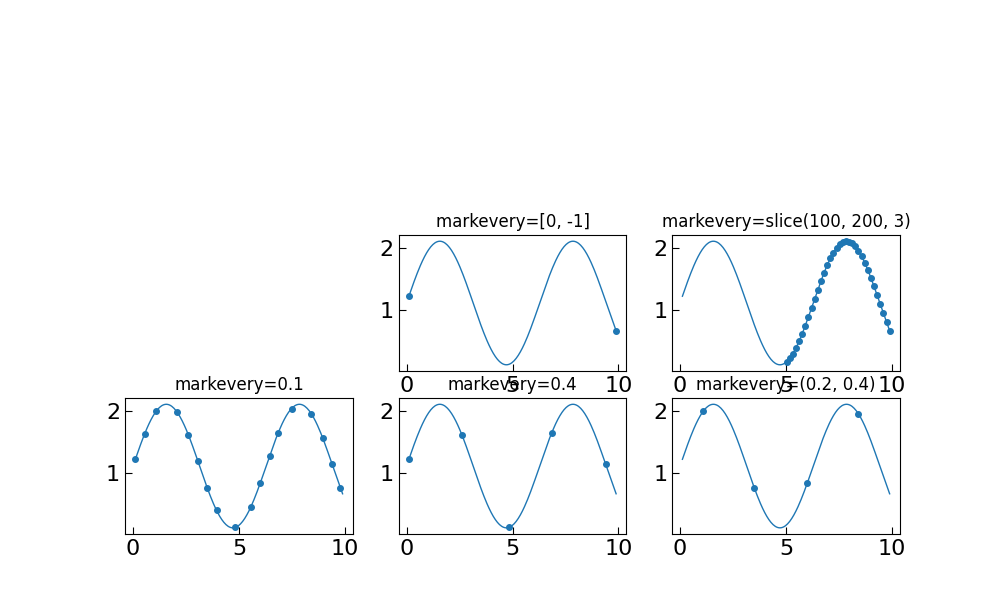

In [21]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta
fig = plt.figure(figsize=(10, 6))

for count, case in enumerate(cases):
    if count > 3:
        axes = fig.add_subplot(3, 3, count + 1)
        axes.set_title(f'markevery={case}')
        # axes名を変えなくてもplotで登録される
        axes.plot(x, y, 'o', ls='-', ms=4, markevery=case)


### 大量グラフの出力

[【matplotlib】大量に画像を出力した際に発生したメモリ不足により落ちる現象への対処\[Python\]](https://qiita.com/uz29/items/dd2e4c4fb2acaee5a93d)  
[Matplotlibで大量に画像を出力するとメモリリークする問題をなんとかしたい](https://3pysci.com/matplotlib_memoryleak-1/)

```
plt.cla()
plt.clf()
plt.clear()
```